In [1]:
!pip install split_folders

In [1]:
import splitfolders

In [2]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np 



import os
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib



import seaborn as sns
sns.set(style='whitegrid')
import os
import glob as gb #디렉토리내에 있는 파일들을 리스트로 리턴
import cv2        #이미지처리

import keras
%matplotlib inline




import h5py
import math
import pandas as pd

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


Using TensorFlow backend.


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
image_height,image_width=(224,224)
batch_size=32
train_path=r'D:\Compressed\archive_4\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'

valid_path=r'D:\Compressed\archive_4\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'
test_path=r'D:\Compressed\archive_4\New Plant Diseases Dataset(Augmented)\valid'


In [5]:
def train_generator():
   
    train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.4)
    #train generator 
    train_generator=train_datagen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                subset='validation')
    #vaid_generator 
    valid_generator=train_datagen.flow_from_directory(valid_path,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='validation')
    test_generator=train_datagen.flow_from_directory(test_path,
                                                target_size=(224,224),
                                                batch_size=1,
                                                class_mode='categorical',
                                                subset='validation')
    return train_generator,valid_generator,test_generator


In [6]:
 train_generator,valid_generator,test_generator=train_generator()

Found 7334 images belonging to 10 classes.
Found 1832 images belonging to 10 classes.
Found 1832 images belonging to 10 classes.


In [7]:
type(train_generator[0][0][0])

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


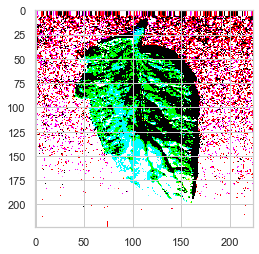

In [8]:

    
plt.imshow(train_generator[0][0][10])

#### 

In [9]:
#importing the libraries
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:

def classes_and_code():
    root=pathlib.Path(train_path)
    classes=[ i for i in os.listdir(train_path) if '.' not in i]
    Code=[]
    for i in range(len(classes)):
        Code+={classes[i]}
        Code+=[i]
    code={Code[i]:Code[i+1] for i in range(0,len(Code),2)}
    
    return classes,code

In [11]:
def getcode(n):
    classes,code=classes_and_code()
    for x,y in code.items():
        if n==y:
            return x

In [12]:
def train_image_number(print_n=False):
    summation=[]
    for folder in os.listdir(train_path):
        files=gb.glob(str(train_path+'/'+folder+'/*.jpg'))
        if print_n==True:
            
            print(f' for training data , found {len(files)} in folder { folder} \n')
        summation.append(len(files))
    return summation    

In [13]:
def validation_image_number(print_n=False):
    summation=[]
    for folder in os.listdir(valid_path):
        files=gb.glob(str(valid_path+'/'+folder+'/*.jpg'))
        if print_n==True:
            
            print(f' for validation data , found {len(files)} in folder { folder} \n')
        summation.append(len(files))
    return summation   

In [14]:
train_image_no=train_image_number()
sum(train_image_no)

18345

In [15]:
val_im_no=validation_image_number()
sum(val_im_no)

4585

In [16]:
def X_and_Y(size):
    classes,code=classes_and_code()
    
    X=[]
    Y=[]
    for folder in os.listdir(train_path):
        files=gb.glob(str(train_path+'/'+folder+'/*.jpg'))
        for file in files:
            image=cv2.imread(file)
            image_array=cv2.resize(image,(size,size))
            X.append(list(image_array))
            Y.append(code[folder])
    X=np.array(X)
    Y=np.array(Y)
    return X,Y

In [ ]:
X,Y=X_and_Y(size=224)

In [ ]:
def plot_image(n_h,n_w):
    plt.figure(figsize=100,100)
    for n,i in enumerate(list(np.random.randint(0,len(x_test),n_h*n_w))):
    plt.subplot(n_h,n_w,n+1)
    plt.imsow(X[i])
    plt.axis('off')
    plt.title(getcode(Y[i]))

In [ ]:
plot_imge()

In [16]:
#Transform
transformer = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5] ,
                        [0.5 , 0.5 , 0.5])
])


In [14]:
train_loader=DataLoader(
                        torchvision.datasets.ImageFolder(train,
                        transform=transformer),
                        batch_size=32,
                        shuffle=True)

In [15]:
valid_loader=DataLoader(torchvision.datasets.ImageFolder(valid,
                         transform=transformer),
                       batch_size=32,
                       shuffle=True)

In [16]:
test_loader=DataLoader(torchvision.datasets.ImageFolder(test,
                                                       transform=transformer),
                      batch_size=32,
                      shuffle=True)

In [17]:
root=pathlib.Path(train)
classes=sorted([ j.name.split('/')[-1] for j in root.iterdir()])

In [18]:
classes

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [19]:
for folder in os.listdir(train):
    files=gb.glob(str(train+'/'+folder+'/*.jpg'))
    print(f"For traing data, found {len(files)} in folder {folder}")
    

For traing data, found 1702 in folder Tomato___Bacterial_spot
For traing data, found 1920 in folder Tomato___Early_blight
For traing data, found 1926 in folder Tomato___healthy
For traing data, found 1851 in folder Tomato___Late_blight
For traing data, found 1882 in folder Tomato___Leaf_Mold
For traing data, found 1745 in folder Tomato___Septoria_leaf_spot
For traing data, found 1741 in folder Tomato___Spider_mites Two-spotted_spider_mite
For traing data, found 1827 in folder Tomato___Target_Spot
For traing data, found 1790 in folder Tomato___Tomato_mosaic_virus
For traing data, found 1961 in folder Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [20]:
size=[]
for folder in os.listdir(train):
    files=gb.glob(str(train+'/'+folder+'/*.jpg'))
    for file in files:
        image=plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts        

<bound method IndexOpsMixin.value_counts of 0        (256, 256, 3)
1        (256, 256, 3)
2        (256, 256, 3)
3        (256, 256, 3)
4        (256, 256, 3)
             ...      
18340    (256, 256, 3)
18341    (256, 256, 3)
18342    (256, 256, 3)
18343    (256, 256, 3)
18344    (256, 256, 3)
Length: 18345, dtype: object>

In [21]:
code={'Tomato___Bacterial_spot':0,
 'Tomato___Early_blight':1,
 'Tomato___Late_blight':2,
 'Tomato___Leaf_Mold':3,
 'Tomato___Septoria_leaf_spot':4,
 'Tomato___Spider_mites Two-spotted_spider_mite':5,
 'Tomato___Target_Spot':6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus':7,
 'Tomato___Tomato_mosaic_virus':8,
 'Tomato___healthy':9}

In [22]:
def getcode(n):
    for X,y in code.items():
        if n==y:
            return X
        

In [22]:
size=224
X_train=[]
y_train=[]
for folder in os.listdir(train):
    files=gb.glob(str(train+'/'+folder+'/*.jpg'))
    for file in files:
        image=cv2.imread(file)
        image_array=cv2.resize(image,(size,size))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [23]:
print(len(X_train))
print(len(y_train))


18345
18345


In [ ]:
plt.figure(figsize=(50,50))
for n,i in enumerate(list(np.random.randint(0,len(X_train),25))):
    plt.subplot(5,5,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

## Image no

## now works on validation set 

In [ ]:
s=224
X_val=[]
y_val=[]
for folder in os.listdir(valid):
    files=gb.glob(str(valid+'/'+folder+'/*.jpg'))
    for file in files:
        image=cv2.imread(file)
        image_array=cv2.resize(image,(s,s))
        X_val.append(list(image_array))
        y_val.append(code[folder])

In [ ]:
len(y_val)

In [ ]:
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(X_val),25))):
    plt.subplot(5,5,n+1)
    plt.imshow(X_val[i])
    plt.axis('off')
    plt.title(getcode(y_val[i]))


In [ ]:
x_test=[]
y_test=[]
for folder in os.listdir(test):
    files=gb.glob(str(test+'/'+folder+'/*jpg'))
    for file in files:
        image=cv2.imread(file)
        image_array=cv2.resize(image,(s,s))
        x_test.append(list(image_array))
        y_test.append(code[folder])

In [ ]:
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(x_test),16))):
    plt.subplot(4,4,n+1)
    plt.imsow(x_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))